In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


In [2]:
ami_dir = Path("/Volumes/Lixi_Liu/ami_premise_peaks")
output_dir = ami_dir / "plots"
output_dir.mkdir(parents=True, exist_ok=True)
print(f"output dir: {output_dir}")


output dir: /Volumes/Lixi_Liu/ami_premise_peaks/plots


In [12]:
baseline_file = "/Volumes/Lixi_Liu/panels_results_550k/results_up00.parquet"
dfb = pd.read_parquet(baseline_file)
dfb.loc[dfb["build_existing_model.vacancy_status"]=="Occupied"]
dfb

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.aiannh_area,...,report_utility_bills.utility_rates_fixed_variable_propane_fixed_usd,report_utility_bills.utility_rates_fixed_variable_propane_total_usd,report_utility_bills.utility_rates_fixed_variable_total_usd,report_utility_bills.utility_rates_fixed_variable_wood_cord_energy_usd,report_utility_bills.utility_rates_fixed_variable_wood_cord_fixed_usd,report_utility_bills.utility_rates_fixed_variable_wood_cord_total_usd,report_utility_bills.utility_rates_fixed_variable_wood_pellets_energy_usd,report_utility_bills.utility_rates_fixed_variable_wood_pellets_fixed_usd,report_utility_bills.utility_rates_fixed_variable_wood_pellets_total_usd,step_failures
0,1,181,2024-08-15 13:45:49,2024-08-15 13:46:10,Success,<NA>,<NA>,,Non-CBSA East South Central,Yes,...,0,0.0,2388.73,0.0,0,0.0,0,0,0,None
1,2,262,2024-08-16 13:33:53,2024-08-16 13:34:13,Success,<NA>,<NA>,,Non-CBSA New England,No,...,0,156.75,5422.48,326.82,0,326.82,0,0,0,None
2,3,262,2024-08-16 14:17:45,2024-08-16 14:18:08,Success,<NA>,<NA>,,"CBSA Boston-Cambridge-Newton, MA-NH",No,...,0,0.0,2464.49,0.0,0,0.0,0,0,0,None
3,4,102,2024-08-15 06:32:40,2024-08-15 06:32:59,Success,<NA>,<NA>,,Non-CBSA West South Central,No,...,0,0.0,2649.14,0.0,0,0.0,0,0,0,None
4,5,28,2024-08-14 17:54:32,2024-08-14 17:54:56,Success,<NA>,<NA>,,"CBSA Riverside-San Bernardino-Ontario, CA",No,...,0,0.0,2507.5,0.0,0,0.0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483058,549995,288,2024-08-15 18:34:05,2024-08-15 18:34:36,Success,<NA>,<NA>,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",No,...,0,0.0,2643.2,0.0,0,0.0,0,0,0,None
483059,549996,201,2024-08-16 08:01:45,2024-08-16 08:02:16,Success,<NA>,<NA>,,Non-CBSA South Atlantic,No,...,0,0.0,2979.78,0.0,0,0.0,0,0,0,None
483060,549997,267,2024-08-16 14:10:45,2024-08-16 14:11:13,Success,<NA>,<NA>,,Non-CBSA Middle Atlantic,No,...,0,0.0,4099.49,1108.46,0,1108.46,0,0,0,None
483061,549998,129,2024-08-15 08:33:08,2024-08-15 08:33:35,Success,<NA>,<NA>,,"CBSA Los Angeles-Long Beach-Anaheim, CA",No,...,0,0.0,1967.96,0.0,0,0.0,0,0,0,None


cherryland
Removed 15 (0.05 %) premises with >240.0 kW


count    32472.000000
mean        26.319150
std         13.675290
min          0.000000
25%         18.176000
50%         25.088000
75%         32.768000
max        232.960008
Name: annual_peak_kw, dtype: float64

ft_collins
Removed 278 (0.36 %) premises with >240.0 kW


count    77198.000000
mean        10.955532
std         12.484043
min          0.000000
25%          7.260000
50%          9.132000
75%         11.496000
max        239.940000
Name: annual_peak_kw, dtype: float64

veic
Removed 35 (0.02 %) premises with >240.0 kW


count    230333.000000
mean          8.468532
std           5.412643
min           0.000000
25%           5.720000
50%           8.120000
75%          10.440000
max         238.440000
Name: annual_peak_kw, dtype: float64

tallahassee
Removed 155 (0.13 %) premises with >240.0 kW


count    122995.000000
mean         11.121327
std          11.283946
min           0.000000
25%           7.540000
50%           9.940000
75%          12.540000
max         239.990400
Name: annual_peak_kw, dtype: float64

epb
Removed 359 (0.22 %) premises with >240.0 kW


count    161395.000000
mean         10.164994
std           7.693066
min           0.000000
25%           7.424000
50%           9.380000
75%          11.725000
max         238.087000
Name: annual_peak_kw, dtype: float64

horry
Removed 65 (0.08 %) premises with >240.0 kW


count    86017.000000
mean        10.731648
std          8.132468
min          0.000000
25%          7.680000
50%         10.368000
75%         13.312000
max        237.780000
Name: annual_peak_kw, dtype: float64

seattle
Removed 60 (0.17 %) premises with >240.0 kW


count    34445.000000
mean         5.931067
std          3.142573
min          0.000000
25%          4.140000
50%          5.854200
75%          7.887600
max         99.600000
Name: annual_peak_kw, dtype: float64

,utility,annual_peak_kw,resolution_min,source
0,cherryland,38.4000,15,cherryland (15min)
1,cherryland,23.5520,15,cherryland (15min)
2,cherryland,33.0240,15,cherryland (15min)
3,cherryland,27.3920,15,cherryland (15min)
4,cherryland,37.8880,15,cherryland (15min)
...,...,...,...,...
744850,seattle,9.5514,60,seattle (60min)
744851,seattle,7.8546,60,seattle (60min)
744852,seattle,5.4342,60,seattle (60min)
744853,seattle,4.4862,60,seattle (60min)


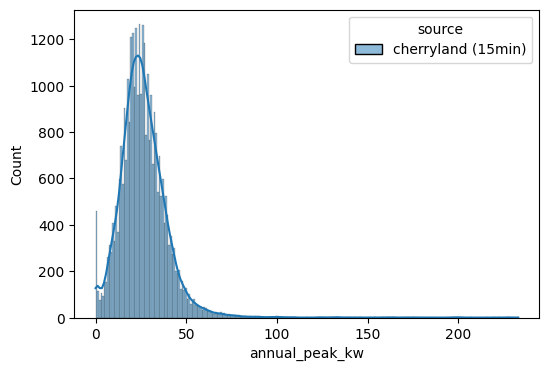

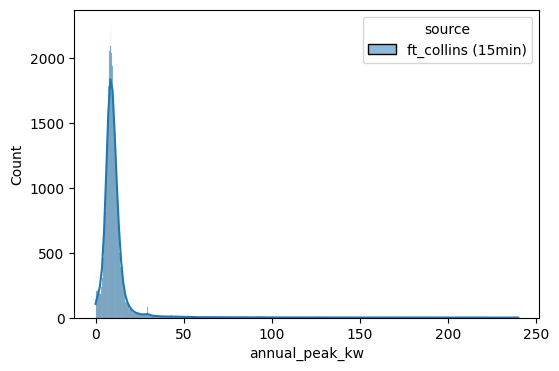

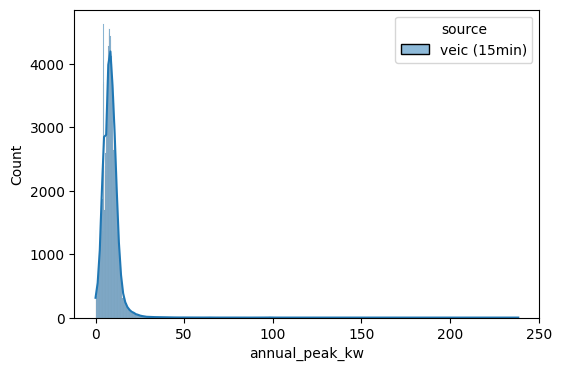

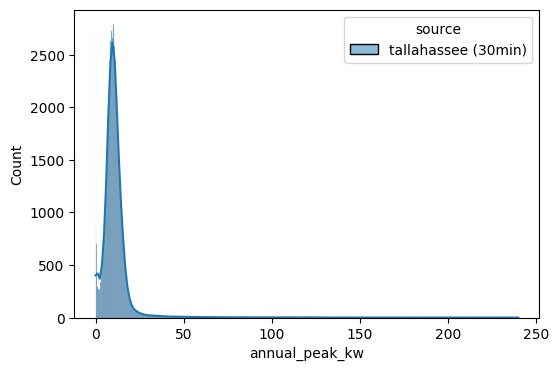

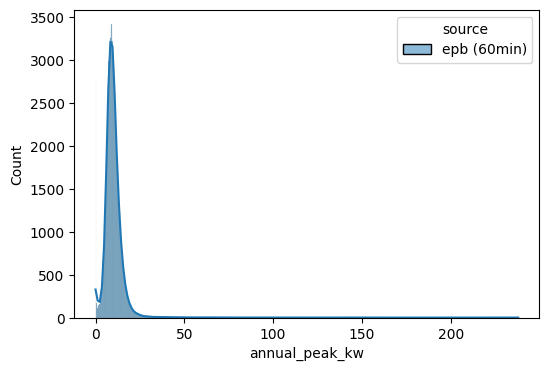

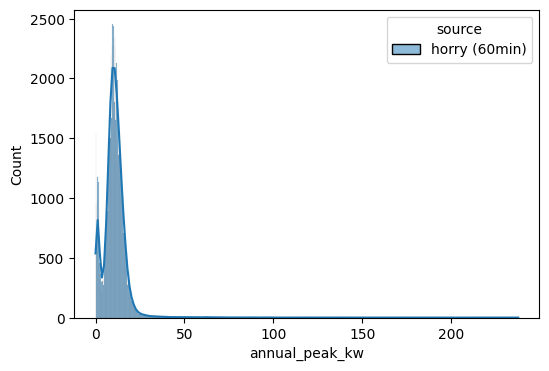

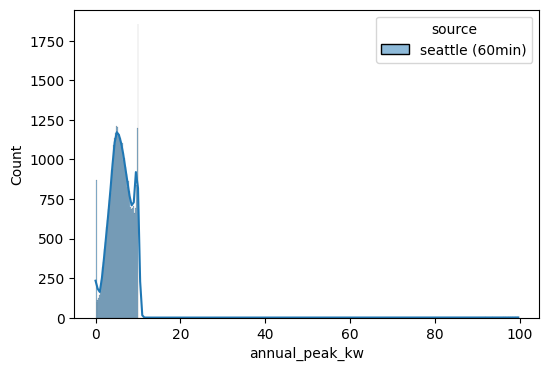

In [ ]:
ami_locs = [
    "cherryland", "ft_collins", "veic", # 15-min
    "tallahassee", # 30-min
    "epb", "horry", "seattle", # 60-min
    ]

DF = []
for ami_loc in ami_locs:
    df = pd.read_csv(ami_dir / f"{ami_loc}_ami_premise_peaks.csv")
    peak_col = df.columns[-1]
    assert "annual_peak" in peak_col

    freq_min = int(peak_col.removeprefix("annual_peak_").split("min")[0])

    df2 = pd.DataFrame(ami_loc, columns=["utility"], index=df.index)
    df2["annual_peak_kw"] = df[peak_col] * 60 / freq_min
    df2["resolution_min"] = freq_min
    df2["source"] = f"{ami_loc} ({freq_min}min)"

    # remove outliers
    max_peak = 1000 * 240 / 1000 # kVA of a 1000A panel
    cond = df2["annual_peak_kw"]<=max_peak
    df2 = df2.loc[cond].reset_index(drop=True)
    n_rmv = len(cond) - cond.sum()

    print(ami_loc)
    print(f"Removed {n_rmv} ({n_rmv/len(cond)*100:.02f} %) premises with >{max_peak} kW")
    display(df2["annual_peak_kw"].describe())
    DF.append(df2)

DF = pd.concat(DF, ignore_index=True)
DF


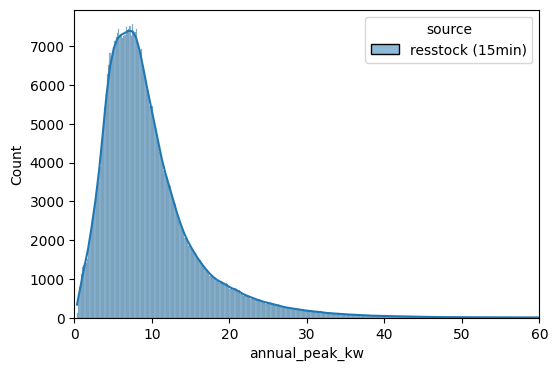

In [39]:
# resstock modeled baseline
dfb2 = pd.DataFrame("resstock", columns=["utility"], index=dfb.index)
dfb2["annual_peak_kw"] = dfb["report_simulation_output.peak_electricity_annual_total_w"].div(1000)
dfb2["resolution_min"] = 15
dfb2["source"] = "resstock (15min)"

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=dfb2, x="annual_peak_kw", hue="source", kde=True, ax=ax)
ax.set_xlim(0, 60)

fig_file = f"Hist__annual_peak_resstock.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
fig.savefig(fig_file, dpi=400, bbox_inches="tight")

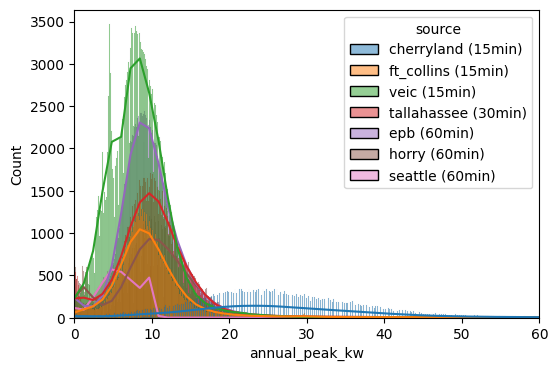

In [20]:
# Zoomed in
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=DF, x="annual_peak_kw", hue="source", kde=True, ax=ax)
ax.set_xlim(0, 60)

fig_file = f"Hist__annual_peak_by_utility_zoomed.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
fig.savefig(fig_file, dpi=400, bbox_inches="tight")

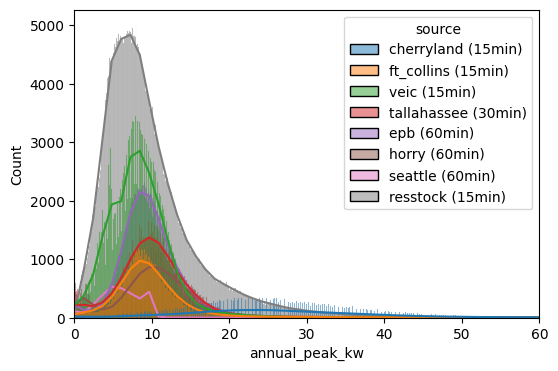

In [33]:
# Zoomed in + ResStock
DF2 = pd.concat([DF, dfb2], ignore_index=True)

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=DF2, x="annual_peak_kw", hue="source", kde=True, ax=ax)
ax.set_xlim(0, 60)

fig_file = f"Hist__annual_peak_by_utility_resstock_zoomed.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
fig.savefig(fig_file, dpi=400, bbox_inches="tight")

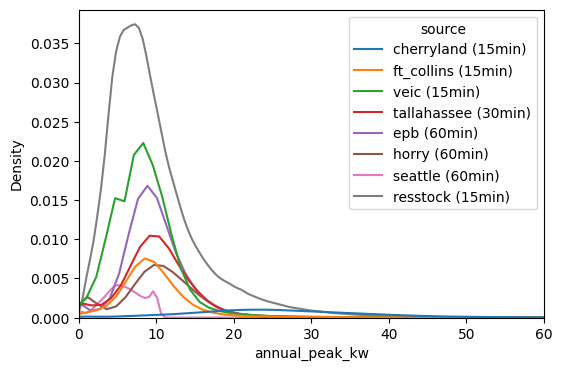

In [26]:
# Zoomed in/normalized + ResStock
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(data=DF2, x="annual_peak_kw", hue="source", ax=ax)
ax.set_xlim(0, 60)

fig_file = f"Hist__annual_peak_by_utility_resstock_zoomed_normalized.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
fig.savefig(fig_file, dpi=400, bbox_inches="tight")

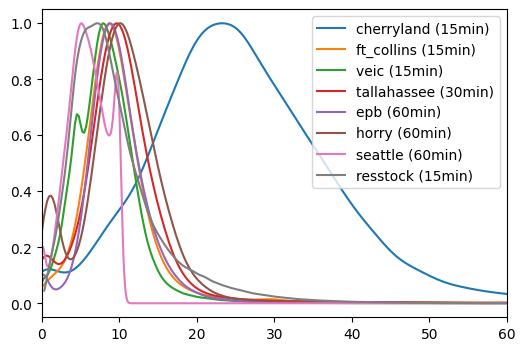

In [43]:
fig, ax = plt.subplots(figsize=(6,4))
sources = DF2["source"].unique()
for src in sources:
    x = DF2.loc[DF2["source"]==src, "annual_peak_kw"]
    eval_points = np.linspace(np.min(x), np.max(x), 1000)
    kde_sp = gaussian_kde(x, bw_method='scott')
    y_sp = kde_sp.pdf(eval_points)
    y_sp /= y_sp.max() # normalize to max=1

    ax.plot(eval_points, y_sp)
ax.legend(sources)
ax.set_xlim(0, 60)

fig_file = f"Hist__annual_peak_by_utility_resstock_zoomed_normalized_to_max.png"
if output_dir is not None:
    fig_file = output_dir / fig_file
fig.savefig(fig_file, dpi=400, bbox_inches="tight")

### Regression on AHU

In [44]:
file = Path("/Users/lliu2/Desktop/panels/HP power rating/regression/hvac_equipment_power_ratings.xlsx") 

data = pd.read_excel(file, sheet_name="AHU")
data

,Brand,Heating fuel,Heating/cooling capacity kBtu/h,Minimum circuit ampacity A,Voltage V,Source
0,Goodman,Electric,24,4.90,208/240,https://documents.alpinehomeair.com/product/go...
1,Goodman,Electric,30,4.90,208/240,NaN
2,Goodman,Electric,36,6.50,208/240,NaN
3,Goodman,Electric,42,6.50,208/240,NaN
4,Goodman,Electric,48,8.60,208/240,NaN
5,Goodman,Electric,60,8.60,208/240,NaN
6,Blueridge,Electric,36,5.00,208/230,https://www.alpinehomeair.com/product/air-hand...
7,Blueridge,Electric,60,9.50,208/230,https://www.alpinehomeair.com/product/air-hand...
8,Blueridge,Electric,18,5.00,208/230,https://www.alpinehomeair.com/product/air-hand...
9,Blueridge,Electric,48,8.60,208/230,https://www.alpinehomeair.com/product/air-hand...


In [87]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [89]:
for fuel in ["Electric", "Gas"]:
    print(f"For {fuel} AHU")
    x = data.loc[data["Heating fuel"]==fuel, "Heating/cooling capacity kBtu/h"].values
    x = x.reshape((len(x), 1))
    y = data.loc[data["Heating fuel"]==fuel, "Minimum circuit ampacity A"].values

    reg = LinearRegression().fit(x, y)
    print("coeff: ", reg.coef_)
    print("incpt: ", reg.intercept_)
    print("R2: ", reg.score(x, y))

    N, p = x.shape
    p += 1 # for intercept

    x_with_incpt = np.empty(shape=(N, p))
    x_with_incpt[:, 0] = 1
    x_with_incpt[:, 1:p] = x

    ols = sm.OLS(y, x_with_incpt)
    print(ols.fit().summary())
    print()

For Electric AHU
coeff:  [0.11105816]
incpt:  2.2197214076246334
R2:  0.8168270467880088
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     66.89
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           6.55e-07
Time:                        14:22:44   Log-Likelihood:                -17.703
No. Observations:                  17   AIC:                             39.41
Df Residuals:                      15   BIC:                             41.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/Users/lliu2/miniconda3/envs/panels/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17

/Users/lliu2/miniconda3/envs/panels/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19

